# 1. Decision Trees
# 1.1 Installing the necessary libraries

In [50]:
pip install Graphviz

Note: you may need to restart the kernel to use updated packages.


In [73]:
import pandas as pd
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Setting random seed.
seed = 10

# In this lab, you need IRIS dataset. Thus, as usual, load the data using read_csv() method. Write code below!

In [53]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.filename)

/Users/azoz1920/opt/anaconda3/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv


In [67]:
from sklearn import datasets
iris= datasets.load_iris()
df=pd.read_csv(r'//Users//azoz1920//opt//anaconda3//lib/python3.7//site-packages//sklearn//datasets//data//iris.csv'
               , delimiter=',', header= 0,
               names= ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Variety'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 1.2 Dealing with dataset the necessary libraries

In [55]:
# Creating a LabelEncoder and fitting it to the dataset labels.
le = LabelEncoder()
le.fit(df['Variety'].values)
# Converting dataset str labels to int labels.
y = le.transform(df['Variety'].values)
# Extracting the instances data.
X = df.drop('Variety', axis=1).values
# Splitting into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=seed)

In [56]:
tree = DecisionTreeClassifier(criterion='gini',
                              min_samples_leaf=5,
                              min_samples_split=5,
                              max_depth=None,
                              random_state=seed)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.9615384615384616


# Exercise 1.1: What is the accuracy of the model? 

<p> 0.9615384615384616 <p>


Confusion Matrix is
[[17  0  0]
 [ 0 17  1]
 [ 0  1 16]]


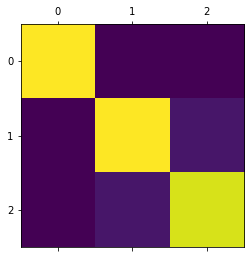

In [57]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
print('Confusion Matrix is')
print(confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.show()


# Exercise 1.2: Execute the code listed above and write down what did you note?

<p> It appeared in the drawing 3 groups <p>
    
# Exercise 1.3
<p>Recall of class 0: is 1<p>
<p>Precision of class 1: is 0.94 == 94%<p>
<p>Positive True of class 2: is 0.94 == 94%<p>
<p>Accuracy of all classes: is 0.96 == 96%<p>

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=df['Variety'].unique()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        18
           2       0.94      0.94      0.94        17

    accuracy                           0.96        52
   macro avg       0.96      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52



In [60]:
weather=['Rainy','Rainy','Overcast','Sunny','Sunny','Sunny',
         'Overcast','Rainy','Rainy','Sunny','Rainy','Overcast',
         'Overcast','Sunny']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool'
      'Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [61]:
import pandas as pd
data= {'weather': ['Rainy','Rainy','Overcast','Sunny','Sunny','Sunny',
                   'Overcast','Rainy','Rainy','Sunny','Rainy','Overcast',
                   'Overcast','Sunny'],
      'temp': ['Hot','Hot','Hot','Mild','Cool','Cool','Cool',
                'Mild','Cool','Mild','Mild','Mild','Hot','Mild'],
      'play': ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']}

data= pd.DataFrame(data)
data

,weather,temp,play
0,Rainy,Hot,No
1,Rainy,Hot,No
2,Overcast,Hot,Yes
3,Sunny,Mild,Yes
4,Sunny,Cool,Yes
5,Sunny,Cool,No
6,Overcast,Cool,Yes
7,Rainy,Mild,No
8,Rainy,Cool,Yes
9,Sunny,Mild,Yes


# Exercise 2.2:

In [62]:
wheather_encoded=le.fit_transform(data['weather'])
print (wheather_encoded)

[1 1 0 2 2 2 0 1 1 2 1 0 0 2]


In [63]:
temp_encoded=le.fit_transform(data['temp'])
label=le.fit_transform(data['play'])
print ("Weather:",wheather_encoded)
print ("Temp:",temp_encoded)
print ("Play:",label)

Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


# Exercise 2.3: Repeat the experiment again but now using Gaussian Naïve Bayes (just replace model= GaussianNB())! Is the result the same? 
<p> yes<p>

In [76]:
features=zip(wheather_encoded,temp_encoded)
features_ls= list(features)
print(features_ls)

[(1, 1), (1, 1), (0, 1), (2, 2), (2, 0), (2, 0), (0, 0), (1, 2), (1, 0), (2, 2), (1, 2), (0, 2), (0, 1), (2, 2)]


In [77]:
## BernoulliNB Model
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(features_ls,label)
predicted= model.predict([[0,2]])
print ("Predicted Value:", predicted)

Predicted Value: [1]


In [78]:
## GaussianNB Model 
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(features_ls,label)
predicted= model.predict([[0,2]])
print ("Predicted Value:", predicted)

Predicted Value: [1]
